In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# seeing the data
data = pd.read_csv("dataset.csv")
print(data.shape)
data.head()

(1781, 21)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,utf-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,iso-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,utf-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [76]:
#in the dataset, there is 21 columns, the last column is the class label
#lets check whether the dataset is imbalance
data["Type"].value_counts()

0    1565
1     216
Name: Type, dtype: int64

The dataset is highly imbalanced. Only 216 datapoints are malicious or phishing. i.e. only 12% of the data has class label 1

## Feature exploration
#### 1. URL_LENGTH

Number of unique values in URL_LENGTH 142
mean of URL_LENGTH 56.96125772038181


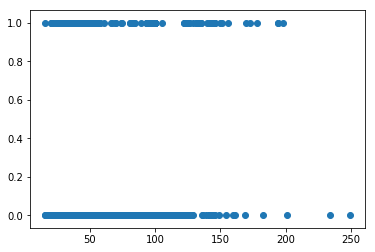

In [77]:
print("Number of unique values in URL_LENGTH",len(data["URL_LENGTH"].value_counts()))
print("mean of URL_LENGTH",data["URL_LENGTH"].mean())
plt.scatter(data["URL_LENGTH"], data["Type"])
plt.show()

In [78]:
#from the above plot we can see that if the length of the url is greater than 170, very few are good urls
#lets check that stats
length_greater_170 = data[data["URL_LENGTH"] > 170]
print(length_greater_170.shape)
print(length_greater_170["Type"].value_counts())

(9, 21)
1    5
0    4
Name: Type, dtype: int64


If the URL_LENGTH is too large then the chances of that website being suspicious is high

#### 2. NUMBER OF SPECIAL CHARACTERS

Number of unique special characters: 31
mean of NUMBER OF SPECIAL CHARACTERS 11.11173498034812


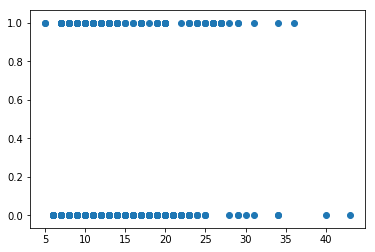

In [79]:
print("Number of unique special characters:", len(data["NUMBER_SPECIAL_CHARACTERS"].value_counts()))
print("mean of NUMBER OF SPECIAL CHARACTERS",data["NUMBER_SPECIAL_CHARACTERS"].mean())
plt.scatter(data["NUMBER_SPECIAL_CHARACTERS"], data["Type"])
plt.show()

In [80]:
#from the above plot we can see that if the NUMBER OF SPECIAL CHARACTERS is greater than 25, very few are good urls
#lets check that stats
SPCL_CHARS_25 = data[data["NUMBER_SPECIAL_CHARACTERS"] > 25]
print(SPCL_CHARS_25.shape)
print(SPCL_CHARS_25["Type"].value_counts())

(28, 21)
1    19
0     9
Name: Type, dtype: int64


If the number of special characters in an url is more than 25, most of cases the url turns out not to be good

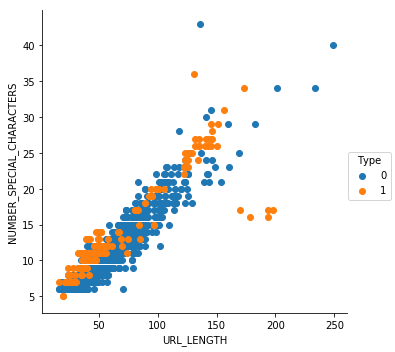

In [81]:
#lets check how these two feature together behaves with the class label
sns.FacetGrid(data, hue="Type", size=5) \
   .map(plt.scatter, "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS") \
   .add_legend()
plt.show()

1. One thing to be noticed here is, if the URL_LENGTH is greater than 150 and NUMBER OF SPECIAL CHARACTERS is between 15 to 20, then the website is not legitimate.
2. Also, if the URL LENGTH is greater than 120 and NUMBER OF SPECIAL CHARACTERS is between 22 to 30, a remarkable number of malicious url are there.
Lets check that stats

In [82]:
data_120 = data[data["URL_LENGTH"] > 120]
data_160 = data_120[data_120["URL_LENGTH"] < 155]
data_22 = data_160[data_160["NUMBER_SPECIAL_CHARACTERS"] > 22 ]
data_30 = data_22[data_22["NUMBER_SPECIAL_CHARACTERS"] <= 30]
data_30["Type"].value_counts()

1    27
0     8
Name: Type, dtype: int64

We can see that,
>if url_length > 120 && url_length < 155 && number of character > 22 && number of characters < 30:
>>                "77 percent of time the url is malicious"

#### 3. CHARSET

In [83]:
print("unique values:")
data["CHARSET"].value_counts()

unique values:


utf-8           1055
iso-8859-1       561
us-ascii         155
None               7
ISO-8859           1
windows-1251       1
windows-1252       1
Name: CHARSET, dtype: int64

In [86]:
# r_temp1 = data[data["CHARSET"]=='UTF-8']
# print("UTF-8 : ",np.unique(r_temp1['Type'],return_counts=True))
# r_temp1 = data[data["CHARSET"]=='ISO-8859-1']
# print('ISO-8859-1',np.unique(r_temp1['Type'],return_counts=True))
x1,y1=[],[]
r_temp1 = data[data["CHARSET"]=='utf-8']
print('utf-8',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][1])
r_temp1 = data[data["CHARSET"]=='us-ascii']
print('us-ascii',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][1])
r_temp1 = data[data["CHARSET"]=='iso-8859-1']
print('iso-8859-1',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][1])
r_temp1 = data[data["CHARSET"]=='None']
print('None',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][1])
r_temp1 = data[data["CHARSET"]=='ISO-8859']
print('ISO-8859',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(0)
r_temp1 = data[data["CHARSET"]=='windows-1251']
print('windows-1251',np.unique(r_temp1['Type'],return_counts=True))
x1.append(0)
y1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
r_temp1 = data[data["CHARSET"]=='windows-1252']
print('windows-1252',np.unique(r_temp1['Type'],return_counts=True))
x1.append(np.unique(r_temp1['Type'],return_counts=True)[1][0])
y1.append(0)

utf-8 (array([0, 1]), array([903, 152]))
us-ascii (array([0, 1]), array([151,   4]))
iso-8859-1 (array([0, 1]), array([503,  58]))
None (array([0, 1]), array([6, 1]))
ISO-8859 (array([0]), array([1]))
windows-1251 (array([1]), array([1]))
windows-1252 (array([0]), array([1]))


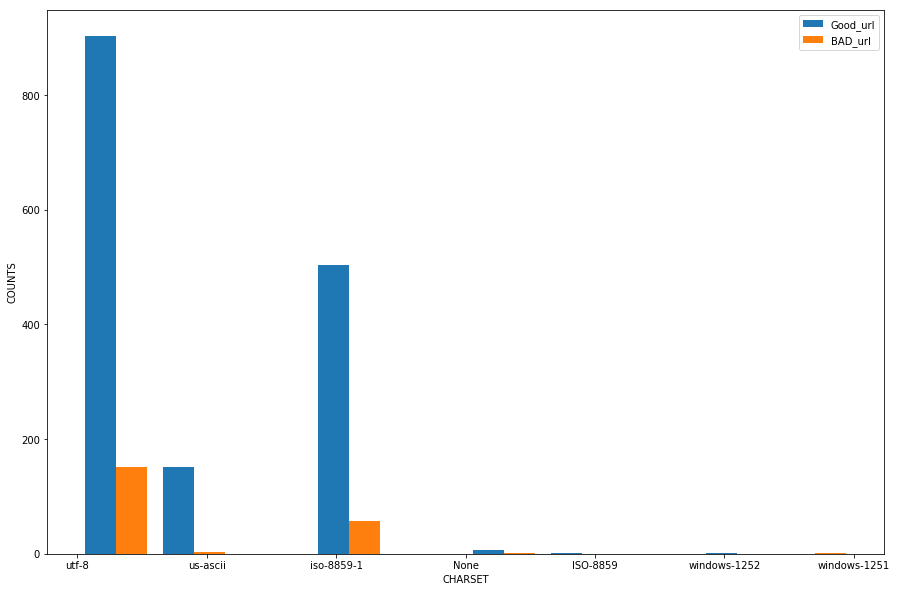

In [102]:
good_url = data[data["Type"] == 0]["CHARSET"]
bad_url = data[data["Type"] == 1]["CHARSET"]
plt.figure(figsize = (15,10))
plt.hist([good_url , bad_url])
plt.xlabel("CHARSET")
plt.ylabel("COUNTS")
plt.legend(('Good_url', 'BAD_url'))

plt.show()
